In [1]:
using DataFrames
using DataStructures
using Plots
using Distributions
include("../../ThinkBayes.jl/src/ThinkBayes.jl")
using .ThinkBayes

In [2]:
odds(p) = p / (1 - p)

odds (generic function with 1 method)

In [3]:
odds(0.75)

3.0

In [4]:
odds(0.1)

0.11111111111111112

In [5]:
odds(0.9)

9.000000000000002

In [6]:
prob(o) = o / (o+1)

prob (generic function with 1 method)

In [7]:
prob(3/2)

0.6

In [8]:
prob2(y, n) = y / (y + n)

prob2 (generic function with 1 method)

In [9]:
prob2(3, 2)

0.6

## Oliver's blood

In [10]:
like1= 0.01
like2=2 * 0.6 * 0.01
likelihood_ratio=like1 / like2

0.8333333333333334

In [11]:
post_odds= 1 * like1 / like2
prob(post_odds)

0.45454545454545453

In [12]:
odds(.9)

9.000000000000002

In [13]:
post_odds= odds(0.9) * like1 / like2
prob(post_odds)

0.8823529411764706

In [14]:
post_odds = odds(0.1) * like1 / like2
prob(post_odds)

0.0847457627118644

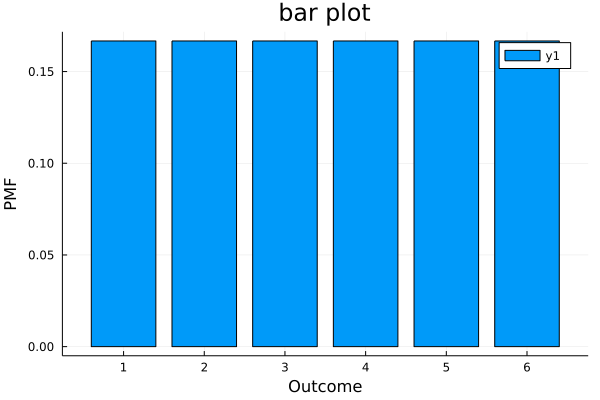

In [15]:
function make_die(sides)
    outcomes=1:sides
    pmf_from_seq(outcomes)
end
die = make_die(6)
bar(die, xaxis=("Outcome"), yaxis=("PMF"))

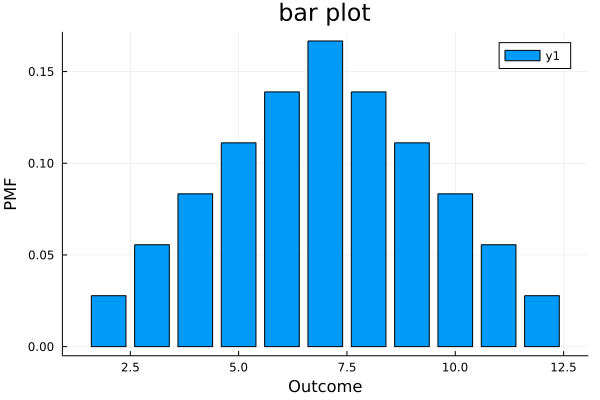

In [16]:
twice=add_dist(die, die)
bar(twice, xaxis=("Outcome"), yaxis=("PMF"))

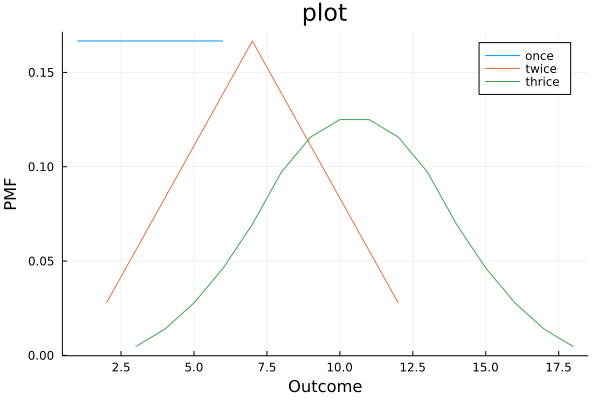

In [17]:
thrice=reduce(add_dist, fill(die, 3))
plot(die, xaxis=("Outcome"), yaxis=("PMF"), label="once")
plot!(twice, label="twice")
plot!(thrice, label="thrice")


## The Forward Problem

In [19]:
n = 35
num_sensitive = 10
num_insensitive = n - num_sensitive

dist_sensitive = make_binomial(num_sensitive, 0.95)
dist_insensitive = make_binomial(num_insensitive, 0.40);

In [21]:
dist_total = add_dist(dist_sensitive, dist_insensitive);

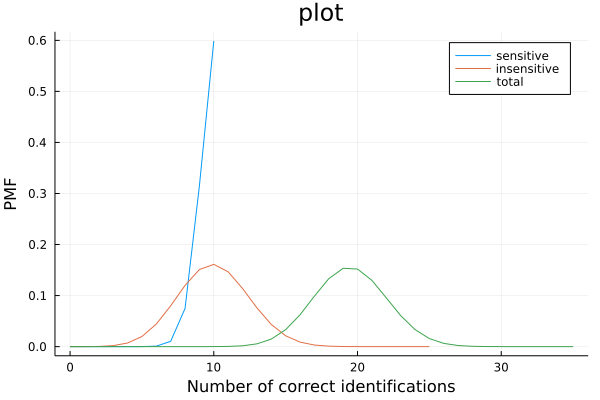

In [22]:
plot(dist_sensitive, xaxis=("Number of correct identifications"), yaxis=("PMF"), label="sensitive")
plot!(dist_insensitive, label="insensitive")
plot!(dist_total, label="total")

## The Inverse Problem

In [67]:
function do_sensitive(num_sensitive, n)
    num_insensitive = n - num_sensitive
    dist_sensitive = make_binomial(num_sensitive, 0.95)
    dist_insensitive = make_binomial(num_insensitive, 0.4)
    probs(add_dist(dist_sensitive, dist_insensitive))
end

table=DataFrame([do_sensitive(ns, n) for ns in 0:n], [Symbol("A"*string(x)) for x in 0:n])


,A0,A1,A2,A3,A4,A5,A6
,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,1.71907e-8,1.43256e-9,1.1938e-10,9.94833e-12,8.29027e-13,6.90856e-14,5.75713e-15
2,4.01117e-7,5.969e-8,7.16279e-9,7.79286e-10,8.01393e-11,7.94484e-12,7.67618e-13
3,4.54599e-6,9.7414e-7,1.70912e-7,2.50643e-8,3.26913e-9,3.94018e-10,4.49024e-11
4,3.33372e-5,9.32649e-6,2.20565e-6,4.37706e-7,7.39812e-8,1.10785e-8,1.51714e-9
5,0.000177799,6.13829e-5,1.84117e-5,4.73479e-6,1.03828e-6,1.96274e-7,3.28858e-8
6,0.000734901,0.000301834,0.000110068,3.51677e-5,9.73521e-6,2.32436e-6,4.82541e-7
7,0.00244967,0.00116651,0.000501735,0.00019264,6.52454e-5,1.93016e-5,4.96701e-6
8,0.00676575,0.00366478,0.00181788,0.000817477,0.00032964,0.000117908,3.70752e-5
9,0.0157868,0.00958482,0.00538939,0.00278244,0.00130645,0.000552195,0.000207986


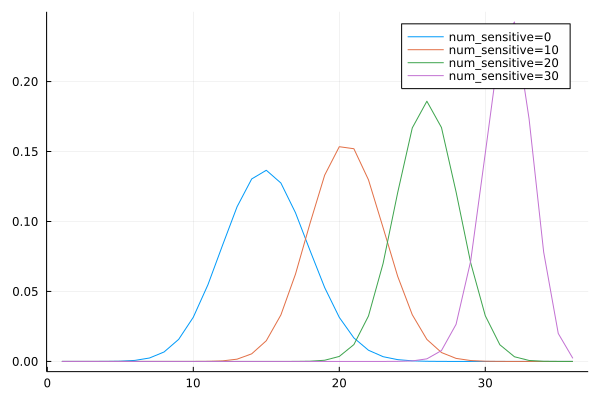

In [75]:
plot(table[!, :A0], label="num_sensitive=0")
plot!(table[!, :A10], label="num_sensitive=10")
plot!(table[!, :A20], label="num_sensitive=20")
plot!(table[!, :A30], label="num_sensitive=30")

In [83]:
likelihood1 = values(table[13, :]);